In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import sys
print(sys.version)
print(sys.executable)
import tensorflow as tf

3.11.7 (main, Jan  6 2026, 21:53:55) [Clang 17.0.0 (clang-1700.6.3.2)]
/Users/apple/.pyenv/versions/3.11.7/bin/python


/Users/apple/.pyenv/versions/3.11.7/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
cols = [
    "fLength",
"fWidth",
"fSizeR",
"fConc",
"fConc1",
"fAsym",
"fM3Long",
"fM3Trans",
"fAlpha",
"fDist",
    "class"
]
df = pd.read_csv("magic04.data", names = cols)
df.head()

,fLength,fWidth,fSizeR,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"] = df["class"].str.strip()   # safety
df["class"] = df["class"].map({"g": 1, "h": 0})

df

,fLength,fWidth,fSizeR,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [4]:
# # l1 loss = sum(|y_real - y_pred|)
# # binary cross entropy loss for binary classification

# for label in cols[:-1]:
#     plt.hist(df[df["class"] == 1][label], color = 'blue', label ="gamma", alpha= 0.7, density=True)
#     plt.hist(df[df["class"]==0][label], color = "red", label="hadron", alpha =0.7, density= True)
#     plt.title(label)
#     plt.ylabel("probability")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()


In [5]:
train , valid, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])

/Users/apple/.pyenv/versions/3.11.7/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_dataset(data, oversample = False):
  X = data[data.columns[:-1]].values
  y = data[data.columns[-1]].values

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)
  scalar = StandardScaler()
  X = scalar.fit_transform(X)
  data = np.hstack((X,np.reshape(y, (-1, 1))))
  return data, X, y

In [7]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [8]:
#knn

In [9]:
from sklearn.neighbors import  KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [11]:
y_pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1350
           1       0.86      0.82      0.84      2454

    accuracy                           0.80      3804
   macro avg       0.78      0.79      0.79      3804
weighted avg       0.81      0.80      0.80      3804



In [13]:
from sklearn.naive_bayes import GaussianNB


In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [15]:
y_pred = nb_model.predict(X_test)

In [16]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.47      0.54      1350
           1       0.75      0.86      0.80      2454

    accuracy                           0.72      3804
   macro avg       0.70      0.66      0.67      3804
weighted avg       0.71      0.72      0.71      3804



In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1350
           1       0.87      0.79      0.83      2454

    accuracy                           0.79      3804
   macro avg       0.77      0.79      0.78      3804
weighted avg       0.80      0.79      0.79      3804



In [20]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred= svc.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1350
           1       0.91      0.85      0.88      2454

    accuracy                           0.85      3804
   macro avg       0.83      0.85      0.84      3804
weighted avg       0.85      0.85      0.85      3804



In [ ]:

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    plt.show()


def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    nn.compile(
        optimizer=tf.keras.optimizers.Adam(lr), 
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    history = nn.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_split=0.2,
        verbose=0
    )
    
    return nn, history


epochs = 100
least_loss = float('inf')
best_model = None
for num_nodes in [64, 32, 16]:
    for dropout_prob in [0.2, 0.4]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"nodes: {num_nodes}, dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)
                if val_loss<least_loss:
                    least_loss = val_loss
                    best_model = model



y_pred = best_model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int).reshape(-1,)







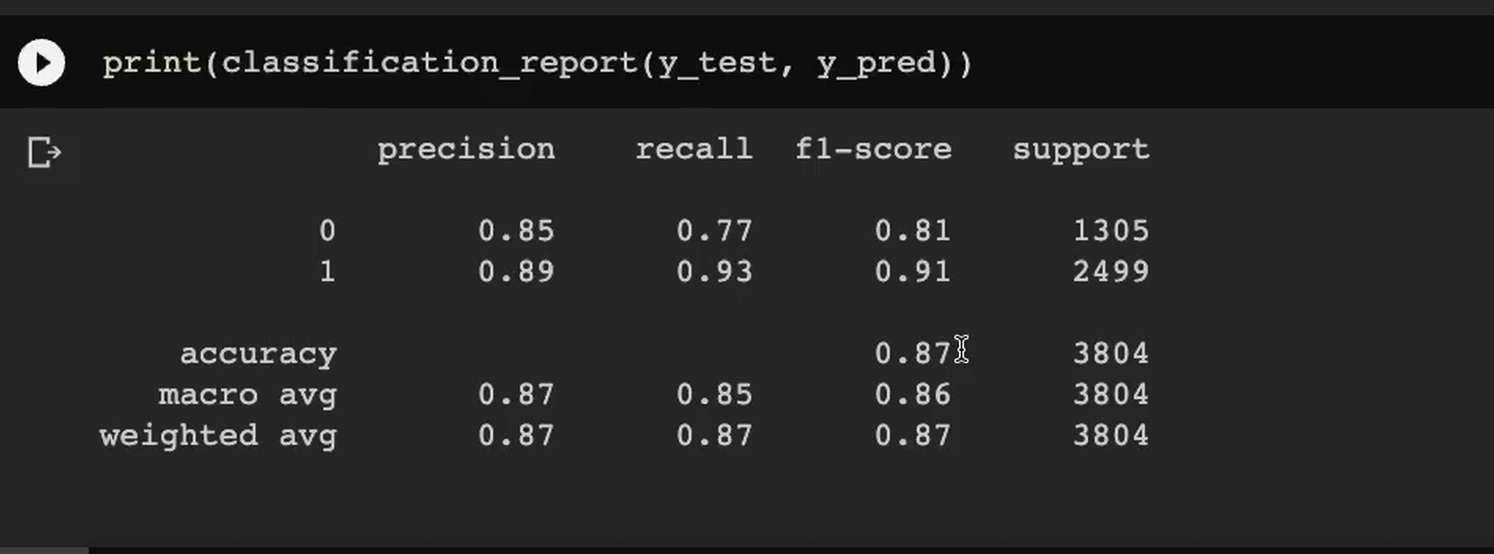

# Lin

In [26]:
cols = ["col1, col2, col3"]
df.columns = cols

df["functional"] = (df["functional"]==1).astype(int)

df.head()

for col in df[1:]:
    plt.scatter(df[col], df['bike_count'])
    plt.title(col)
    plt.show

ValueError: Length mismatch: Expected axis has 11 elements, new values have 1 elements

In [ ]:
df.drop(cols,axis=1)

In [27]:
from sklearn.linear_model._base import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.26292342298227567

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(X_train.reshape(-1)) # vector

temp_nn= tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.dense(1)
])


temp_nn.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001) , loss="mean_squared_error" )

history = temp_nn.fit(
    Xtrain.shape(-1), y_train,
    verbose,
    epochs,
    validation_data
)

